<a href="https://colab.research.google.com/github/vitorgaboardi/network_analysis/blob/main/FlightRoutes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Notebook created by **Vitor Gaboardi dos Santos**

This notebook was designed to create a flight routes graph of a specific country.

#1. Pre-processing Dataset

Importing Libraries

In [1]:
import pandas as pd
pd.__version__

'1.3.0'

The first step is to download the datasets. Both Datasets were taken from the following the [OpenFlights](openflights.org) websites. 

You can use the above website to see how the datasets are organized.

In this notebook, we will use the **airports** and **routes** datasets.

In [2]:
!gdown https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat
!gdown https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat

Downloading...
From: https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat
To: /content/routes.dat
2.38MB [00:00, 36.2MB/s]      
Downloading...
From: https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat
To: /content/airports.dat
1.13MB [00:00, 17.8MB/s]      


Both datasets have information separated by comma. Thus, when using pandas to read the datasets, we must use "sep=','.

In [3]:
airports = pd.read_csv("airports.dat", sep=',', header=None)
routes = pd.read_csv("routes.dat", sep=',', header=None)

In [4]:
airports.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
5,6,Wewak International Airport,Wewak,Papua New Guinea,WWK,AYWK,-3.583830,143.669006,19,10,U,Pacific/Port_Moresby,airport,OurAirports
6,7,Narsarsuaq Airport,Narssarssuaq,Greenland,UAK,BGBW,61.160500,-45.425999,112,-3,E,America/Godthab,airport,OurAirports
7,8,Godthaab / Nuuk Airport,Godthaab,Greenland,GOH,BGGH,64.190903,-51.678101,283,-3,E,America/Godthab,airport,OurAirports
8,9,Kangerlussuaq Airport,Sondrestrom,Greenland,SFJ,BGSF,67.012222,-50.711603,165,-3,E,America/Godthab,airport,OurAirports
9,10,Thule Air Base,Thule,Greenland,THU,BGTL,76.531197,-68.703201,251,-4,E,America/Thule,airport,OurAirports


In this notebook, we will look for all the airports and flights of a specific country.

You can change the country that you want to analyze, just keep in mind that you have to use the same name pattern of the airports dataset.

In [5]:
country = "Brazil"

country_airports = airports[[1,2,4,5,6,7]].loc[airports[3] == country]
country_airports = country_airports.rename(columns={1: "AirportName", 2: "City", 4: "IATA", 5: "ICAO", 6: "Latitude", 7: "Longitude"}).reset_index(drop=True)
country_airports = country_airports.drop_duplicates(subset=['IATA'])
country_airports.head(10)

,AirportName,City,IATA,ICAO,Latitude,Longitude
0,Conceição do Araguaia Airport,Conceicao Do Araguaia,CDJ,SBAA,-8.348350,-49.301498
1,Campo Délio Jardim de Mattos Airport,Rio De Janeiro,\N,SBAF,-22.875099,-43.384701
3,Araraquara Airport,Araracuara,AQA,SBAQ,-21.812000,-48.132999
4,Santa Maria Airport,Aracaju,AJU,SBAR,-10.984000,-37.070301
5,Piloto Osvaldo Marques Dias Airport,Alta Floresta,AFL,SBAT,-9.866389,-56.105000
6,Araçatuba Airport,Aracatuba,ARU,SBAU,-21.141300,-50.424702
7,Val de Cans/Júlio Cezar Ribeiro International ...,Belem,BEL,SBBE,-1.379250,-48.476299
8,Comandante Gustavo Kraemer Airport,Bage,BGX,SBBG,-31.390499,-54.112202
9,Pampulha - Carlos Drummond de Andrade Airport,Belo Horizonte,PLU,SBBH,-19.851200,-43.950600
10,Bacacheri Airport,Curitiba,BFH,SBBI,-25.405100,-49.231998


In [6]:
len(country_airports)

211

Now let's work with the routes dataset.

First, we must filter the useful information and label them.

In [7]:
routes = routes[[2,4]].rename(columns={2: "SourceAirportCode", 4: "DestinationAirportCode"})
routes.head(10)

,SourceAirportCode,DestinationAirportCode
0,AER,KZN
1,ASF,KZN
2,ASF,MRV
3,CEK,KZN
4,CEK,OVB
5,DME,KZN
6,DME,NBC
7,DME,TGK
8,DME,UUA
9,EGO,KGD


To build a graph with only the routes of the chosen country, we will check if the routes have the **SourceAirportCode** and **DestinationAirportCode** in common with the information inside the *country_airports* DataFrame. 

Besides, we will also use the *drop_duplicates* function because the original dataset also considers the airlines that performs the route, which can result in dupplicate data.

In [8]:
country_routes = routes[(routes.SourceAirportCode.isin(country_airports.IATA)) & (routes.DestinationAirportCode.isin(country_airports.IATA))].drop_duplicates().reset_index(drop=True)
country_routes.head(10)

,SourceAirportCode,DestinationAirportCode
0,AUX,PMW
1,BRA,BSB
2,BRA,SSA
3,BSB,BRA
4,BSB,OPS
5,BSB,RAO
6,CAC,GRU
7,CGB,GYN
8,CGB,OPS
9,CGR,DOU


In [9]:
len(country_routes)

710

To see all the routes from a specific Source Airport, you can change the *SourceAirportCode* variable below and run the cell.

In [10]:
SourceAirportCode = "GRU"

for index, route in country_routes.iterrows():
  if(route["SourceAirportCode"] == SourceAirportCode):
    print(route["SourceAirportCode"], route["DestinationAirportCode"])

GRU CAC
GRU DOU
GRU RAO
GRU UBA
GRU UDI
GRU VDC
GRU ARU
GRU BSB
GRU CGB
GRU CGR
GRU CNF
GRU CWB
GRU GYN
GRU IOS
GRU IPN
GRU NVT
GRU PLU
GRU POA
GRU REC
GRU SDU
GRU SSA
GRU AJU
GRU BEL
GRU BPS
GRU FLN
GRU FOR
GRU GIG
GRU IGU
GRU JPA
GRU LDB
GRU MAO
GRU MCZ
GRU MGF
GRU NAT
GRU SLZ
GRU THE
GRU VIX
GRU JOI
GRU SJP
GRU JDO
GRU PFB


#2. Creating Networkx Graph

In [11]:
import networkx as nx
nx.__version__

'2.5.1'

Now, we will create the Graph object using the *country_routes* pandas Dataframe and set the attributes of each node based on the *country_airports*

In [12]:
G = nx.from_pandas_edgelist(country_routes, source='SourceAirportCode', target='DestinationAirportCode')
nx.set_node_attributes(G, country_airports.set_index('IATA').to_dict('index'))
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 124
Number of edges: 370
Average degree:   5.9677


In [13]:
G.nodes['NAT']

{'AirportName': 'Governador Aluízio Alves International Airport',
 'City': 'Natal',
 'ICAO': 'SBSG',
 'Latitude': -5.768056,
 'Longitude': -35.376111}

In [14]:
G.edges('NAT')

EdgeDataView([('NAT', 'FEN'), ('NAT', 'FOR'), ('NAT', 'CNF'), ('NAT', 'REC'), ('NAT', 'VCP'), ('NAT', 'BSB'), ('NAT', 'GIG'), ('NAT', 'GRU'), ('NAT', 'SSA')])

#3. Exercises

## 3.1 - Is there a direct flight between Natal (NAT) and Foz do Iguaçu (IGU)? A direct flight is one with no intermediate stops.

In [15]:
"NAT" in list(nx.neighbors(G, "IGU"))

False

In [16]:
"IGU" in list(nx.neighbors(G, "NAT"))

False

##3.2 - If you wanted to fly from Natal to Foz do Iguaçu, what would be an itinerary with the fewest number of flights?

In [17]:
nx.shortest_path(G, "NAT", "IGU")

['NAT', 'VCP', 'IGU']

In [18]:
nx.shortest_path_length(G, "NAT", "IGU")

2

##3.3 - Is it possible to travel from any airport in Brazil to any other airport in Brazil, possibly using connecting flights? In other words, does there exist a path in the network between every possible pair of airports?

In [19]:
nx.is_connected(G)

True

*PS: The graph was constructed based on the connections between the airports and **NOT** the TOTAL number of airports. Therefore, there are airports that are not represented in the graph (the ones that do not connect with any other).*

#4 Bonus

Drawing the graph connections using the latitude and longitude values.

In [20]:
!pip install nxviz

In [21]:
from nxviz import GeoPlot
import matplotlib.pyplot as plt

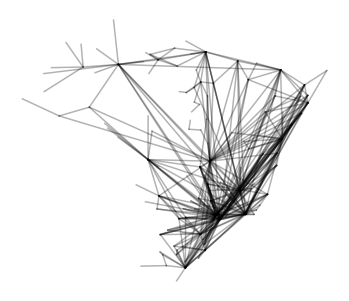

In [22]:
g = GeoPlot(G,
            node_lat="Latitude",
            node_lon="Longitude",
            node_size=0.005)

g.draw()
plt.show()